# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', delimiter=';')

### Convert the SalesDate field to a datetime data type.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         object 
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


In [4]:
data['SalesDate'] = pd.to_datetime(data['SalesDate'])

In [5]:
data.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


In [7]:
data['Date'] = data['SalesDate'].dt.date
data['Year'] = data['SalesDate'].dt.year
data['Month'] = data['SalesDate'].dt.strftime('%B')
data['Day'] = data['SalesDate'].dt.day
data['Hour'] = data['SalesDate'].dt.hour
data['Weekday'] = data['SalesDate'].dt.weekday

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
 9   Date               object        
 10  Year               float64       
 11  Month              object        
 12  Day                float64       
 13  Hour               float64       
 14  Weekday            float64       
dtypes: datetime64[ns](1), float64(5), int64(5), object(4)
memory usage: 773.4+ MB


### Create a line chart showing the number of total units sold per day in February.

In [9]:
feb = data[data['Month'] == 'February']

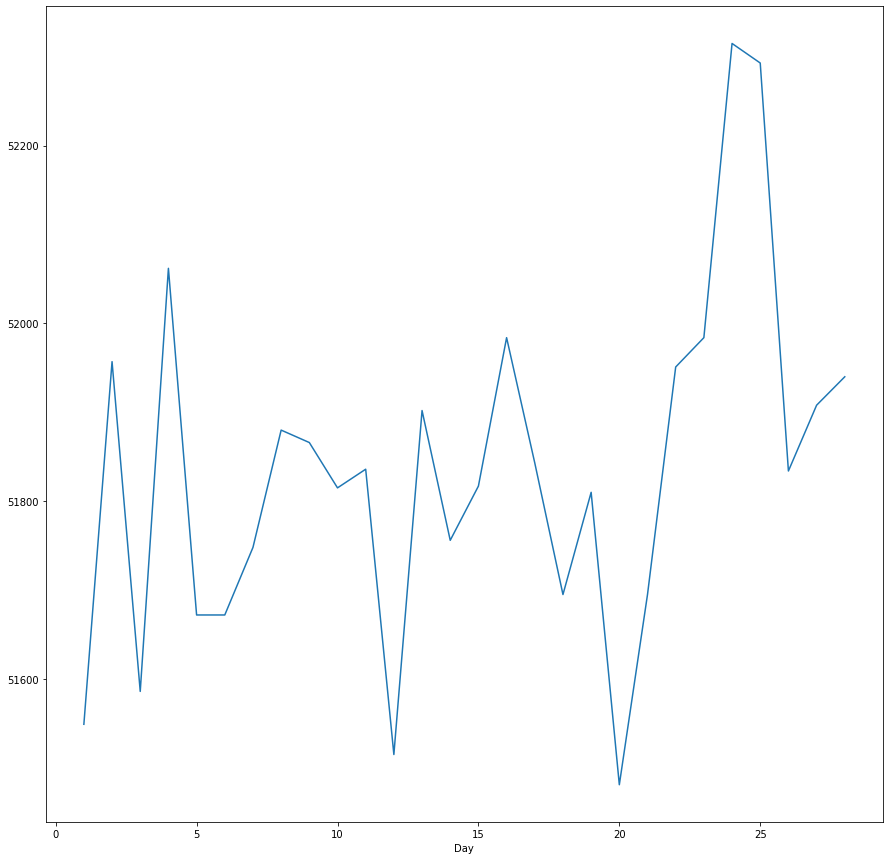

In [10]:
feb.groupby('Day').count()['Quantity'].plot(kind='line', figsize=(15,15))

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [11]:
mar = data[data['Month'] == 'March']
id124 = mar[mar['ProductID'] == 124]
id344 = mar[mar['ProductID'] == 344]
id407 = mar[mar['ProductID'] == 407]
id449 = mar[mar['ProductID'] == 449]

In [12]:
marsales = pd.concat([id124, id344, id407, id449])

In [13]:
marID = marsales.pivot_table(index='Day', columns='ProductID', values='Quantity', aggfunc='count')

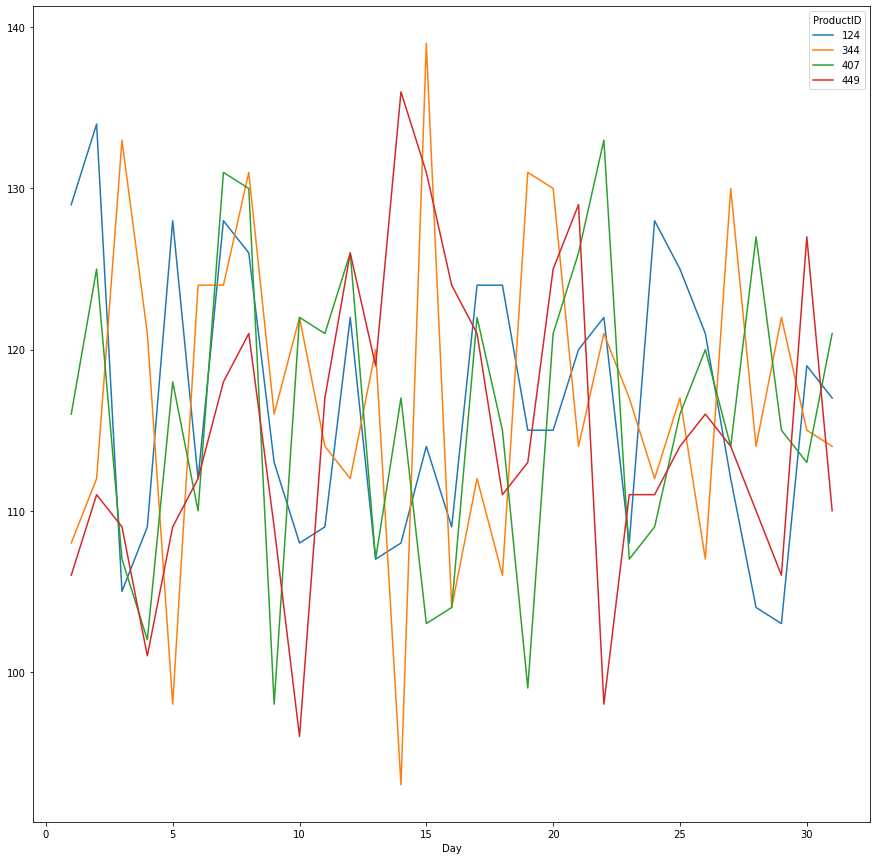

In [14]:
marID.plot(kind='line', figsize=(15,15))

### Create a bar chart that shows units sold by each hour of the day.

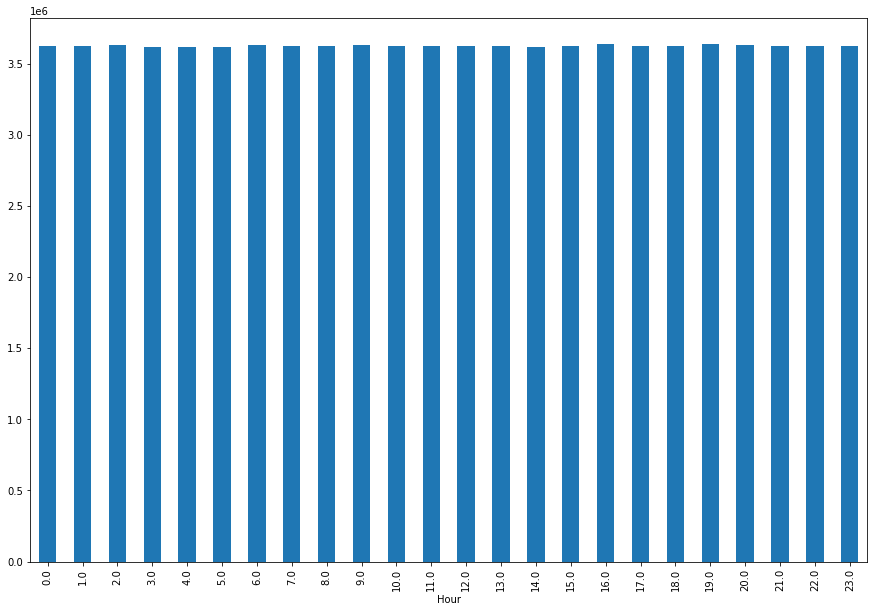

In [25]:
data.groupby('Hour').sum()['Quantity'].plot(kind='bar', figsize=(15,10))

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

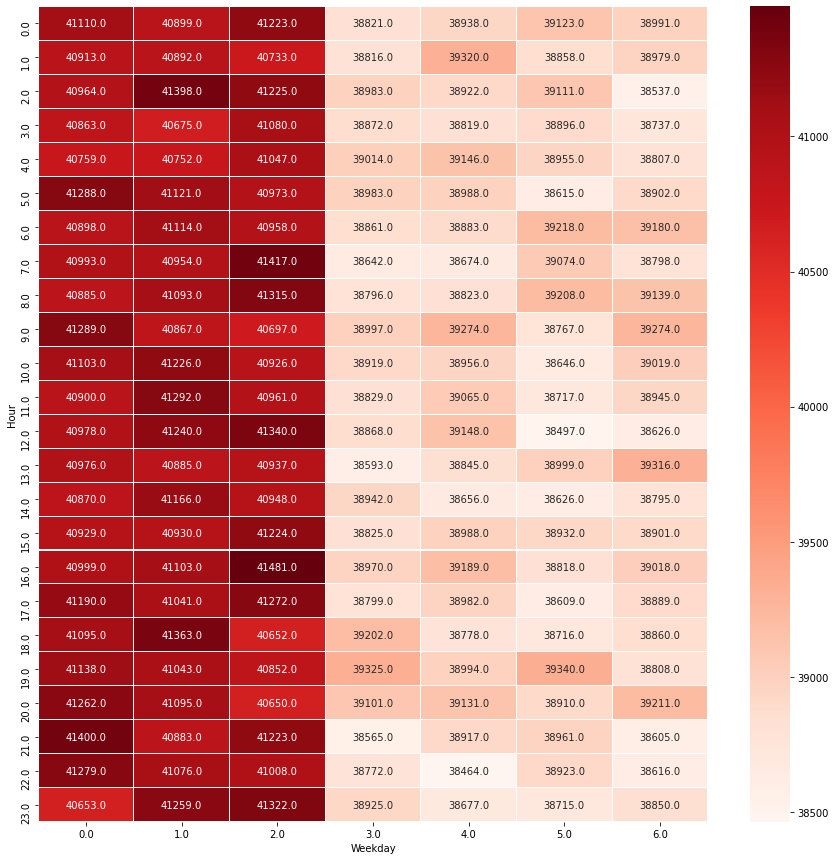

In [16]:
heatmap_ = data.pivot_table(index='Hour', columns='Weekday', values='Quantity', aggfunc='count')
plt.figure(figsize=(15,15))
sns.heatmap(data=heatmap_, annot=True, fmt='.1f', cmap='Reds', linewidths=.01)

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [17]:
from random import sample

In [18]:
ids = list(data['ProductID'].unique())
rids = sample(ids,20)
#rids

In [19]:
rand = data[data['ProductID'].isin(rids)]

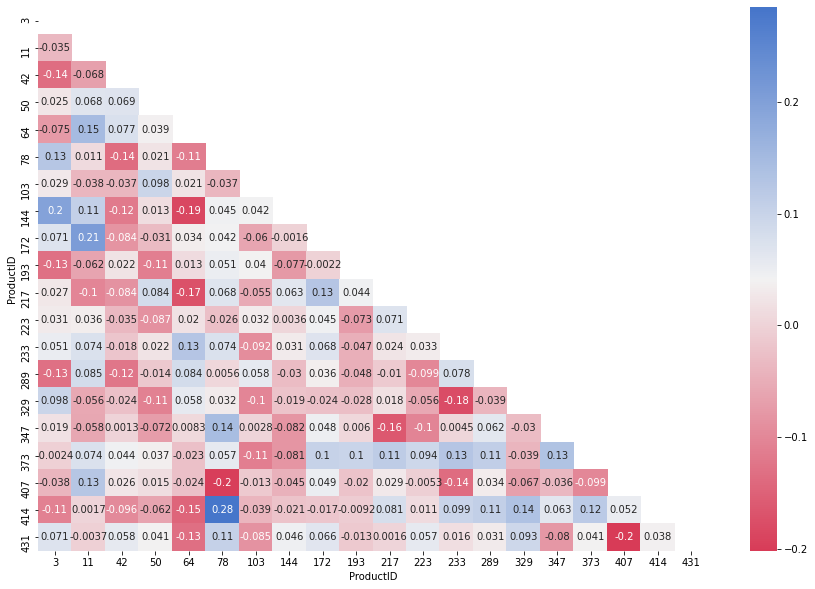

In [26]:
rand_sales = rand.pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')
corr = rand_sales.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.subplots(figsize=(15,10))
cmap= sns.diverging_palette(6, 255, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap)
plt.show()

### Create a histogram showing the distribution of daily units sold.

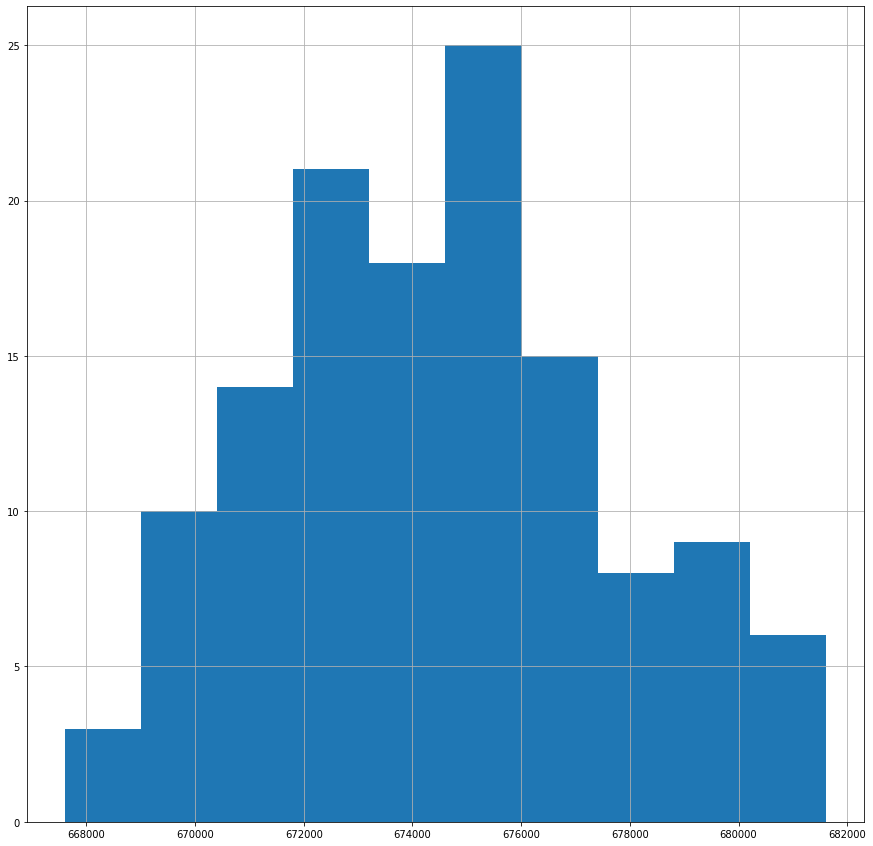

In [21]:
plt.figure(figsize=(15,15))
data.groupby('Date').sum()['Quantity'].hist()
plt.show()

### Create a violin plot showing the distribution of daily units sold by month.

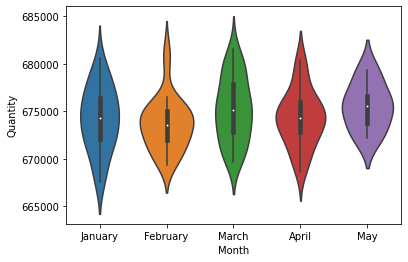

In [27]:
monthly=data.groupby(['Date','Month'], as_index=False).sum()
ax=sns.violinplot(data=monthly, x='Month', y='Quantity')